<center>

# Web Intelligence

# Who will win the Australian Open 2020 Tournament?

## 01 Data Cleaning - Missing Values Filling

### Riccardo Spolaor (864877)

</center>

# Controllo e filling Missing Values
Controllo quali feature presentano valori mancanti e procedo al loro filling.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
dataframe = pd.read_csv('./datasets/dataframe00.csv', low_memory = False)

In [3]:
dataframe.head()

,csvID,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Controllo Valori Anomali
***MaxL*** assume un valore massimo anomalo ed aumenta la varianza di quella feature in modo anomalo rispetto alla varianza delle altre odds. Procedo a sistemare mettendo a nan i valori anomali (>200), procederò poi a riempirli col filling delle missing values

In [4]:
dataframe.loc[:, dataframe.isna().any()].describe().T

,count,mean,std,min,25%,50%,75%,max
WRank,51926.0,58.834149,72.867897,1.000,17.000,41.000,77.00,1890.00
LRank,51837.0,91.367942,115.545980,1.000,35.000,65.000,104.00,2159.00
W1,51675.0,5.796381,1.238560,0.000,6.000,6.000,6.00,7.00
L1,51677.0,4.063491,1.846291,0.000,3.000,4.000,6.00,7.00
W2,51171.0,5.778312,1.252156,0.000,6.000,6.000,6.00,7.00
L2,51172.0,3.884761,1.873057,0.000,2.000,4.000,6.00,7.00
W3,23950.0,6.028267,0.930906,0.000,6.000,6.000,6.00,7.00
L3,23950.0,3.614823,1.768276,0.000,2.000,4.000,5.00,7.00
W4,4729.0,5.778389,1.272326,0.000,6.000,6.000,6.00,7.00
L4,4729.0,3.877353,1.896478,0.000,2.000,4.000,6.00,7.00


In [5]:
dataframe.loc[dataframe['MaxL'] > 200, :]

,csvID,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
40369,14,39.0,London,Wimbledon,2015-06-30,Grand Slam,Outdoor,Grass,1st Round,5.0,...,NaN,NaN,1.06,9.00,NaN,NaN,1.07,42136.0,1.05,9.80
43564,15,52.0,New York,US Open,2016-08-30,Grand Slam,Outdoor,Hard,1st Round,5.0,...,NaN,NaN,1.22,4.33,NaN,NaN,1.24,42586.0,1.20,4.37


In [6]:
dataframe.loc[dataframe['MaxL'] > 200, 'MaxL'] = np.nan

In [7]:
dataframe.loc[:, dataframe.isna().any()].describe().T

,count,mean,std,min,25%,50%,75%,max
WRank,51926.0,58.834149,72.867897,1.000,17.000,41.000,77.0000,1890.00
LRank,51837.0,91.367942,115.545980,1.000,35.000,65.000,104.0000,2159.00
W1,51675.0,5.796381,1.238560,0.000,6.000,6.000,6.0000,7.00
L1,51677.0,4.063491,1.846291,0.000,3.000,4.000,6.0000,7.00
W2,51171.0,5.778312,1.252156,0.000,6.000,6.000,6.0000,7.00
L2,51172.0,3.884761,1.873057,0.000,2.000,4.000,6.0000,7.00
W3,23950.0,6.028267,0.930906,0.000,6.000,6.000,6.0000,7.00
L3,23950.0,3.614823,1.768276,0.000,2.000,4.000,5.0000,7.00
W4,4729.0,5.778389,1.272326,0.000,6.000,6.000,6.0000,7.00
L4,4729.0,3.877353,1.896478,0.000,2.000,4.000,6.0000,7.00


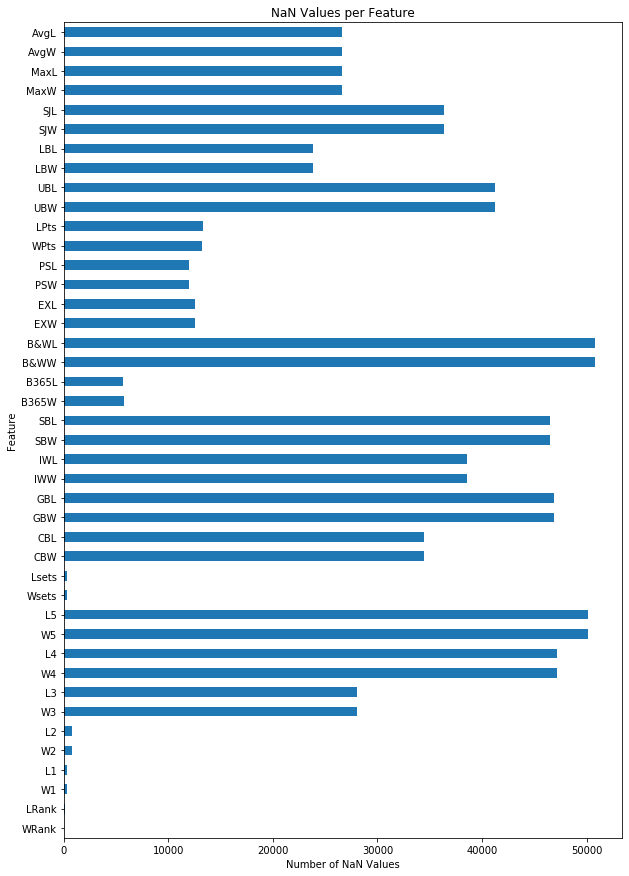

In [8]:
def printNan():
    try:
        df = dataframe.isna().sum()
        df = df[df > 0]
        ax = df.plot.barh(figsize=(10, 15), title = 'NaN Values per Feature')
        ax.set(xlabel = 'Number of NaN Values', ylabel = 'Feature')
        ax
    except:
        print("Non ci sono valori NaN.")
    
printNan()

## MaxW, MaxL, AvgW, AvgL Filling

Come prima cosa procedo a correggere le feature riguardanti le scommesse dei bookmaker.

Procedo riempiendo le feature ***AvgW*** e ***AvgL*** che presentano valori *NaN* rispettivamente con la media delle scommesse dei bookmaker per il vincitore e per il perdente.

Procedo riempiendo le feature ***MaxW*** e ***MaxL*** che presentano valori *NaN* rispettivamente con il massimo tra le scommesse dei bookmaker per il vincitore e per il perdente (considero pure ***AvgW*** e ***AvgL***).

Procedo riempiendo le feature ***AvgW***, ***AvgL***, ***MaxW*** e ***MaxL*** che presentano ancora valori *NaN* e che non avevano quindi scommesse singole dei bookmaker con la media dei valori delle rispettive colonne.

Inserisco le colonne ***AvgWAdded***, ***AvgLAdded***, ***MaxWAdded*** e ***MaxLAdded*** che presentano il valore 0 se il valore delle scommesse medie o massime era già presente o è stato calcolato con la media delle scommesse dei bookmaker per quel giocatore, e che presentano il valore 1 se il valore è stato calcolato con la media dei valori della colonna.

Infine elimino tutte le colonne del dataset riguardanti le scommesse dei singoli bookmaker.

In [9]:
# Calcolo AVG E E MAX DELLE PREDIZIONI DEI BOOKMAKER E FILLO CON VALORI MEDI CIO' CHE MANCA
odds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW']
odds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL']

print('Procedo al filling di AvgW e AvgL usando le altre predizioni dei bookmaker dove è possibile:')
print('AvgW settati a NaN prima: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN prima: ',sum(dataframe['AvgL'].isna()))
dataframe['AvgW'].fillna(dataframe[odds_W].mean(axis=1), inplace = True)
dataframe['AvgL'].fillna(dataframe[odds_L].mean(axis=1), inplace= True)
print('AvgW settati a NaN dopo: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN dopo: ',sum(dataframe['AvgL'].isna()), '\n')

print('Procedo al filling di MaxW e MaxL usando le altre predizioni dei bookmaker dove è possibile:')
print('MaxW settati a NaN prima: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN prima: ',sum(dataframe['MaxL'].isna()))
dataframe['MaxW'].fillna(dataframe[odds_W + ['AvgW']].max(axis=1), inplace = True)
dataframe['MaxL'].fillna(dataframe[odds_L + ['AvgL']].max(axis=1), inplace= True)
print('MaxW settati a NaN dopo: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN dopo: ',sum(dataframe['MaxL'].isna()), '\n')

print('Procedo al filling delle righe dove AvgW, AvgL e MaxW, MaxL hanno valori NaN tramite la media dei valori della colonna:')

dataframe.insert(dataframe.columns.get_loc('AvgW') + 1, column = 'AvgWAdded', value = 0)
dataframe.loc[dataframe['AvgW'].isna(), 'AvgWAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('AvgL') + 1, column = 'AvgLAdded', value = 0)
dataframe.loc[dataframe['AvgL'].isna(), 'AvgLAdded'] = 1

dataframe.insert(dataframe.columns.get_loc('MaxW') + 1, column = 'MaxWAdded', value = 0)
dataframe.loc[dataframe['MaxW'].isna(), 'MaxWAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('MaxL') + 1, column = 'MaxLAdded', value = 0)
dataframe.loc[dataframe['MaxL'].isna(), 'MaxLAdded'] = 1


dataframe['AvgW'].fillna(dataframe['AvgW'].mean(), inplace= True)
dataframe['AvgL'].fillna(dataframe['AvgL'].mean(), inplace= True)
dataframe['MaxW'].fillna(dataframe['MaxW'].mean(), inplace= True)
dataframe['MaxL'].fillna(dataframe['MaxL'].mean(), inplace= True)
dataframe.drop(odds_W + odds_L, axis = 1, inplace= True)

print(dataframe.columns)

dataframe = dataframe.reset_index(drop = True)

Procedo al filling di AvgW e AvgL usando le altre predizioni dei bookmaker dove è possibile:
AvgW settati a NaN prima:  26591
AvgL settati a NaN prima:  26591
AvgW settati a NaN dopo:  929
AvgL settati a NaN dopo:  929 

Procedo al filling di MaxW e MaxL usando le altre predizioni dei bookmaker dove è possibile:
MaxW settati a NaN prima:  26591
MaxL settati a NaN prima:  26593
MaxW settati a NaN dopo:  929
MaxL settati a NaN dopo:  929 

Procedo al filling delle righe dove AvgW, AvgL e MaxW, MaxL hanno valori NaN tramite la media dei valori della colonna:
Index(['csvID', 'ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court',
       'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'WPts', 'LPts', 'MaxW', 'MaxWAdded', 'MaxL',
       'MaxLAdded', 'AvgW', 'AvgWAdded', 'AvgL', 'AvgLAdded'],
      dtype='object')


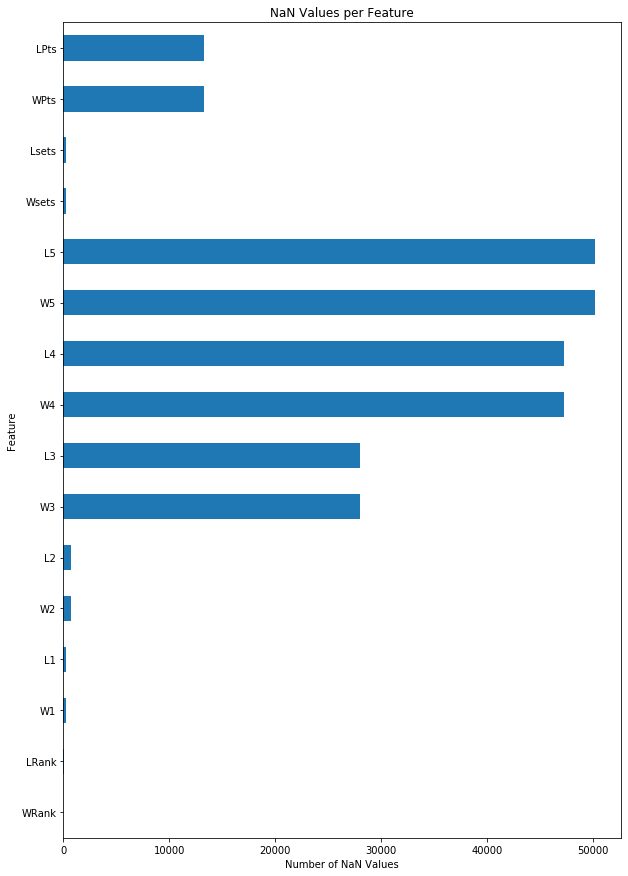

In [10]:
printNan()

## Rank e Pts Relation
Dato che i Punti determinano il Rank dei giocatori, controllo la relazione tra essi.
Noto come Punteggi alti determinano Rank bassi.

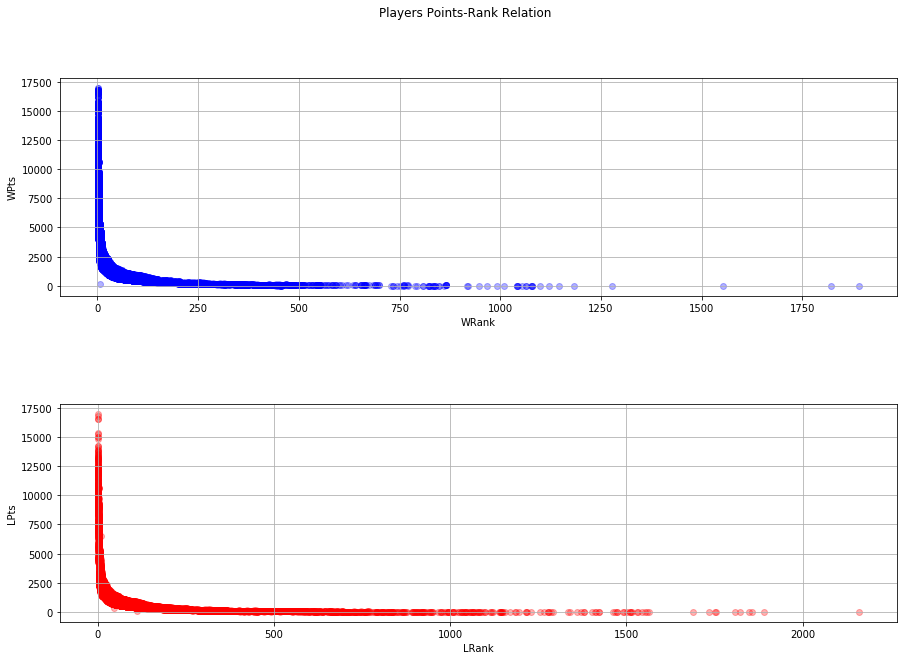

In [11]:
import matplotlib.pyplot as plt
    
def plot_pts_rank_relation():
    fig, ax = plt.subplots(2, figsize = (15,10))
    fig.suptitle('Players Points-Rank Relation')
    ax[0].scatter(dataframe['WRank'], dataframe['WPts'], color = 'blue', alpha=0.3)
    ax[1].scatter(dataframe['LRank'], dataframe['LPts'], color = 'red', alpha=0.3)
    ax[0].set(xlabel = 'WRank', ylabel = 'WPts')
    ax[1].set(xlabel = 'LRank', ylabel = 'LPts')
    ax[0].grid()
    ax[1].grid()
    fig.subplots_adjust(hspace = 0.5)
    
plot_pts_rank_relation()

## WRank e LRank Filling

Procedo a correggere le feature riguardanti il Rank dei giocatori (***WRank*** e ***LRank***).

Assegno ai valori del Ranking settati a *NaN* il valore  medio dei ranking (***WRank*** e ***LRank***) di quel giocatore, se questo valore non esiste assegno al giocatore il Rank più alto + 1.

Aggiungo le colonne ***WRankAdded*** e ***LRankAdded*** che assumono valori binari:
* 0 se il Rank era già presente;
* 1 se è stato inferito manualmente.

In [12]:
def getMeanFeatureOfPlayer(player, value):
    rankList = dataframe[dataframe['Winner'] == player]['W'+value].append(
        dataframe[dataframe['Loser'] == player]['L'+value])
    return rankList.mean(skipna = True)

def getPlayersMeanFeature (value):
    players = dataframe['Winner'].append(dataframe['Loser']).unique()
    return {x : getMeanFeatureOfPlayer(x,value) for x in players}
    
def assignFeatureToPlayers(value):
    playersMeanRank = getPlayersMeanFeature (value)
    meanW = dataframe[dataframe['W'+value].isna()]['Winner'].apply(lambda x: playersMeanRank[x])
    meanL = dataframe[dataframe['L'+value].isna()]['Loser'].apply(lambda x: playersMeanRank[x])
    dataframe['W'+value].fillna(meanW, inplace = True)
    dataframe['L'+value].fillna(meanL, inplace = True)

In [13]:
dataframe.insert(dataframe.columns.get_loc('WRank') + 1, column = 'WRankAdded', value = 0)
dataframe.loc[dataframe['WRank'].isna(), 'WRankAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LRank') + 1, column = 'LRankAdded', value = 0)
dataframe.loc[dataframe['LRank'].isna(), 'LRankAdded'] = 1

print('Filling di WRank e LRank:')
print('WRank settati a NaN prima: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN prima: ',sum(dataframe['LRank'].isna()))

assignFeatureToPlayers('Rank')

print('WRank settati a NaN dopo: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN dopo: ',sum(dataframe['LRank'].isna()), '\n')

print('Metto il Rank più basso a righe  con WRank e LRank ancora settate a NaN:')
print('WRank settati a NaN prima: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN prima: ',sum(dataframe['LRank'].isna()))

dataframe['WRank'].fillna(max(list(dataframe['WRank']) + list(dataframe['LRank']))+1, inplace = True)
dataframe['LRank'].fillna(max(list(dataframe['WRank']) + list(dataframe['LRank']))+1, inplace = True)

print('WRank settati a NaN dopo: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN dopo: ',sum(dataframe['LRank'].isna()), '\n')

dataframe = dataframe.reset_index(drop = True)

Filling di WRank e LRank:
WRank settati a NaN prima:  19
LRank settati a NaN prima:  108
WRank settati a NaN dopo:  1
LRank settati a NaN dopo:  34 

Metto il Rank più basso a righe  con WRank e LRank ancora settate a NaN:
WRank settati a NaN prima:  1
LRank settati a NaN prima:  34
WRank settati a NaN dopo:  0
LRank settati a NaN dopo:  0 



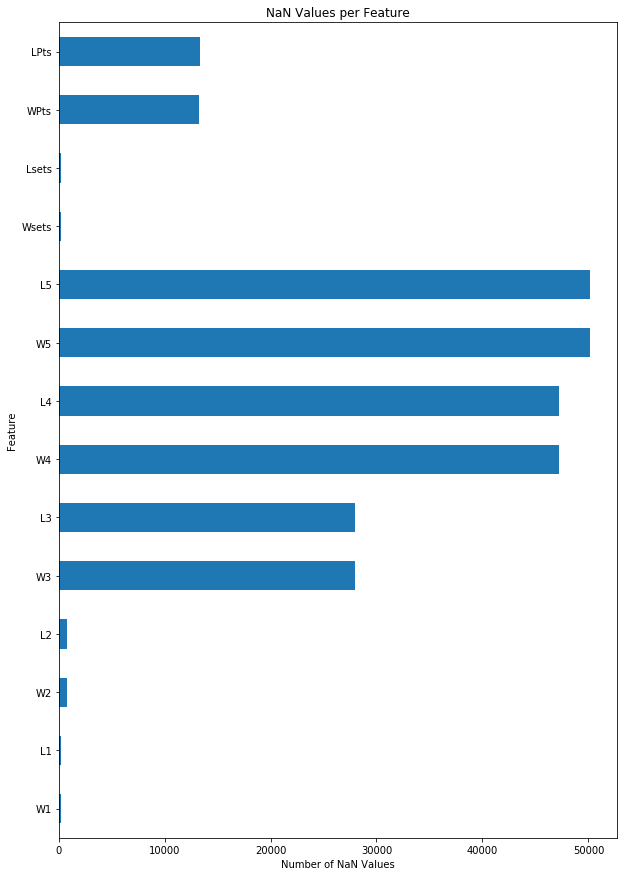

In [14]:
printNan()

## WPts e LPts Filling

Procedo a correggere le feature mancanti riguardanti i Punti dei giocatori (***WPts*** e ***LPts***) in modo analogo a quanto ho fatto per ***WRank*** e ***LRank***, eccetto che inserisco il valore dei punti minimo -1 quando non riesco ad inferire i punti dalla media dei punti del giocatore.

Aggiungo anche in questo caso le colonne ***WPtsAdded*** e ***LPtsAdded*** che assumono valori binari:

* 0 se i Punti erano già presenti;
* 1 se sono stati inferiti manualmente.


In [15]:
dataframe.insert(dataframe.columns.get_loc('WPts') + 1, column = 'WPtsAdded', value = 0)
dataframe.loc[dataframe['WPts'].isna(), 'WPtsAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LPts') + 1, column = 'LPtsAdded', value = 0)
dataframe.loc[dataframe['LPts'].isna(), 'LPtsAdded'] = 1

print('Filling di WPts e LPts:')
print('WPts settati a NaN prima: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN prima: ',sum(dataframe['LPts'].isna()))
            
assignFeatureToPlayers('Pts')

print('WPts settati a NaN dopo: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN dopo: ',sum(dataframe['LPts'].isna()), '\n')

print('Metto punti minimi a righe  con WPts e LPts ancora settate a NaN:')
print('WPts settati a NaN prima: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN prima: ',sum(dataframe['LPts'].isna()))

dataframe['WPts'].fillna(np.nanmin(list(dataframe['WPts']) + list(dataframe['LPts']))-1, inplace = True)
dataframe['LPts'].fillna(np.nanmin(list(dataframe['WPts']) + list(dataframe['LPts']))-1, inplace = True)

print('WPts settati a NaN dopo: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN dopo: ',sum(dataframe['LPts'].isna()), '\n')

dataframe = dataframe.reset_index(drop = True)

Filling di WPts e LPts:
WPts settati a NaN prima:  13244
LPts settati a NaN prima:  13313
WPts settati a NaN dopo:  1823
LPts settati a NaN dopo:  2597 

Metto punti minimi a righe  con WPts e LPts ancora settate a NaN:
WPts settati a NaN prima:  1823
LPts settati a NaN prima:  2597
WPts settati a NaN dopo:  0
LPts settati a NaN dopo:  0 



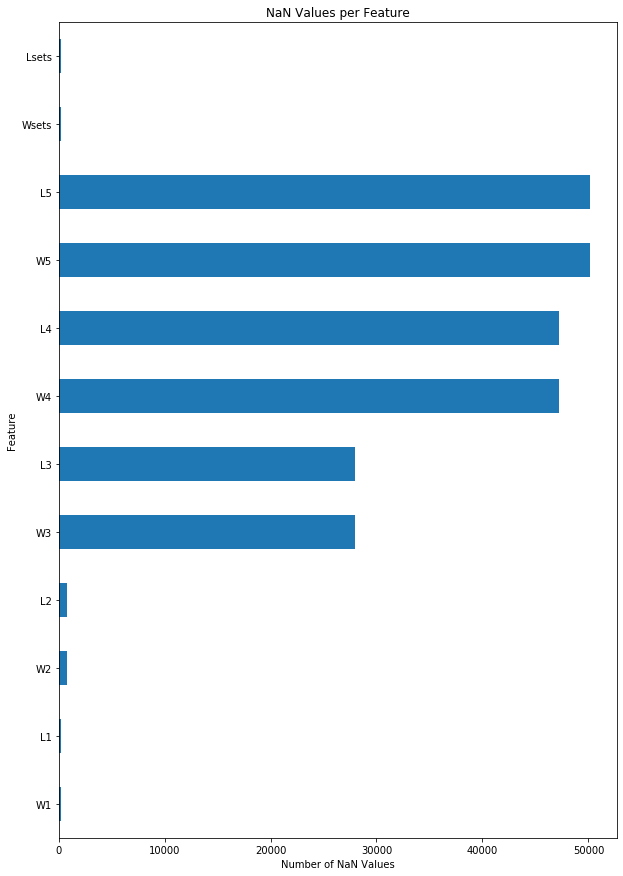

In [16]:
printNan()

## W1, W2, W3, W4, W5, L1, L2, L3, L4, L5, Wsets, Lsets Filling

Per quanto riguarda i valori *NaN* delle feature riguardanti i Set vinti dal vincitore e dal perdente (***Wsets*** e ***Lsets***) e i valori delle feature riguardanti i Punti per ogni Set dei due giocatori (***W1***, ***W2***, ***W3***, ***W4***, ***W5*** e ***L1***, ***L2***, ***L3***, ***L4***, ***L5***):
* Controllo solo i valori *NaN* di ***Wsets*** quando le partite sono state portate a termine (***Comment*** = *'Completed'*);
* Correggo assegnando un valore adeguato;
* Setto tutti i valori *NaN* rimanenti delle feature a 0.

In [17]:
def fill_wsets_nan():
    print ('\nCommenti delle partite in cui Wsets', ' e Lsets', ' è NULL e la partita è stata completata.\n')
    df = dataframe[dataframe['Wsets'].isna()]
    wrong_df = df[df['Comment']=='Completed']
    display(wrong_df[['W1','W2','W3','W4','W5','L1','L2','L3','L4','L5', 'Wsets','Lsets', 'Best of', 'Comment']])
    print ('\nEssendo una partita al meglio di 5 riempio il valore NaN con 3\n')
    dataframe.loc[wrong_df.index,'Wsets'] = 3
    display(dataframe.loc[wrong_df.index,['W1','W2','W3','W4','W5','L1','L2','L3','L4','L5', 'Wsets','Lsets', 
                                          'Best of','Comment']])

fill_wsets_nan()


Commenti delle partite in cui Wsets  e Lsets  è NULL e la partita è stata completata.



,W1,W2,W3,W4,W5,L1,L2,L3,L4,L5,Wsets,Lsets,Best of,Comment
16201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Completed



Essendo una partita al meglio di 5 riempio il valore NaN con 3



,W1,W2,W3,W4,W5,L1,L2,L3,L4,L5,Wsets,Lsets,Best of,Comment
16201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,5.0,Completed


In [18]:
dataframe.loc[:,'W1':'Lsets'] = dataframe.loc[:,'W1':'Lsets'].fillna(0)

In [19]:
printNan()

Non ci sono valori NaN.


In [20]:
dataframe.to_csv('./datasets/dataframe01.csv', index = False)